# Regresion lineal y Logística

En esta práctica se comprenderan los métodos de regresión lineal y regresión logística, así como el método de optimización de parametros Gradiente Descendiente. Esto se ara atraves de librearias estadisticas y de machine learning.

1. Cargar archivo csv con datos de calificaciones (GPA y SAT) de estudiantes etiquetados
2. Estimar regresión lineal de los datos con Statsmodels
3. Estimar regresión logística con datos de estatura y peso de hombres y mujeres
4. Predicción de clases (Hombre/Mujer)
5. Entrenamiento de regresión lineal con Gradiente Descendiente

In [1]:
!pip install pandas
!pip install statsmodels

## 1. Cargar archivo csv con datos de calificaciones (GPA y SAT) de estudiantes etiquetados

Se carga un archivo con calificaciones de estudiantes:

__Grade Point Average (GPA):__ Calculo del promedio de calificacones de un alumno durante un curso. Internacionalmente reconocido.

__Scholastic Assessment Test (SAT):__ examen estandarizado para la admisión a la universidad en E.U.A.

Se requiere saber si existe una relación causal entre el GPA y SAT, esto quiere decir que se busca saber como afectara la calificación obtenida en GPA a los alumnos al momento de realizar su SAT. Se esperaria que un alumno con un alta calificación en GPA tuviera una alta calificación en el examen SAT.

               SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000


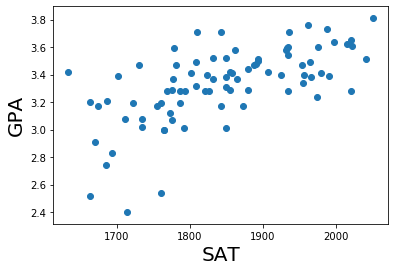

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('Data/Simple linear regression.csv')
print(data.describe())

y = data ['GPA']
x1 = data ['SAT']

plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## 2. Estimar regresión lineal de los datos con Statsmodels

__StatsModels:__ es un modulo de python que provee clases y funciones para la estimación de modelos estadísticos, realizar pruebas estadísticas y exploración de datos. 

__Ordinary Least Squares (OLS):__ Es el método de minimos cuadrados ordinarios para la estimación de una regresión lineal

In [3]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           7.20e-11
Time:                        17:11:37   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

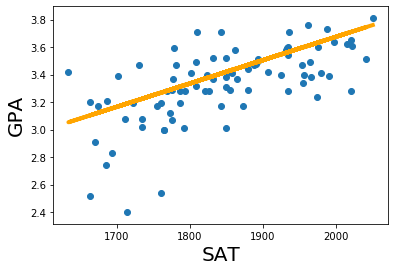

In [4]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## 3. Cargar archivo csv con datos de estatura y peso de hombres y mujeres

Se carga un archivo con el peso y la estatura de diferentes personas. Esto a traves de una relación logistica, ya que el sexo es una variable categórica (Hombre/Mujer). Para el ajuse de la regresión lineal se utilizara la libreria Sklearn.

Se requiere saber si existe una relación causal entre el la altura, el peso y el sexo de una persona. Se utilizara una regresión logistica para saber si a traves de los valores del peso y la estatura se puede identificar el sexo de una persona

Text(0, 0.5, 'Weight (lbs)')

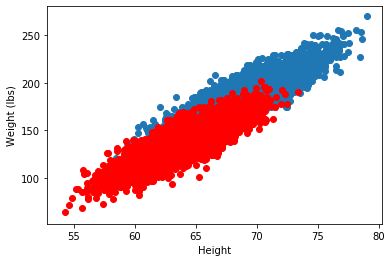

In [5]:
import numpy as np
from sklearn import linear_model

# Load data
data = np.loadtxt('Data/heights_weights.csv', delimiter=',', skiprows=1)
X = data[:,1:3]
y = data[:,0]

female_idx = np.where(y==1)
male_idx = np.where(y==0)

plt.scatter(X[male_idx,0],X[male_idx,1])
plt.scatter(X[female_idx,0],X[female_idx,1], c = 'r')
plt.xlabel('Height')
plt.ylabel('Weight (lbs)')

### Entrenar Regresión logística con Sklearn

In [6]:
# Fit (train) the Logistic Regression classifier
clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = clf.fit(X, y)

# For theta_0:
print( fitted_model.intercept_ )
# For theta_1 and theta_2:
print( fitted_model.coef_ )

[-0.69254177]
[[ 0.49261999 -0.19834042]]


## 4. Predicción de clases

Estimar el sexo de una persona de acuerdo a su peso y estatura utilizando la regresión logística estimada

In [7]:
# Predict
prediction_result = clf.predict([(65,190)])
print(prediction_result)

[0.]


## 5. Entrenamiento de regresión lineal con Gradiente Descendiente

Se realizara el entrenamiento de una regresión lineal con datos creados aleatoriamente. El entrenamiento se llevara a cabo mediante el método de optimización de Gradiente Descendiente utilizando L2_norm como función de perdida para la evaluación del modelo

### Crear datos aleatorios y agregar ruido

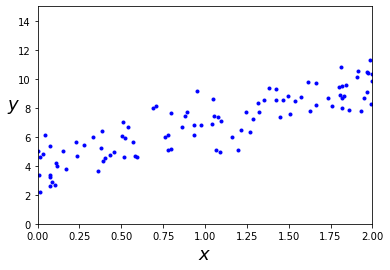

In [8]:
import numpy as np
import matplotlib
import random

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1) #add noise to data

n_observations = len(y)

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

### Definir las funciones de perdida (L2_norm) y de optimización (Gradiente descendiente)

In [9]:
def  cal_cost(w,X,y):
    predictions = np.dot(X,w)
    cost = (1/(2*n_observations))*(predictions - y)
    
    return cost

def gradient_descent(X,y,w,learning_rate=0.01,iterations=100):
    
    cost_history = np.zeros(iterations)
    w_history = np.zeros((iterations,2))
    
    for it in range(iterations):
        
        #Calculate gradient cost
        cost = cal_cost(w,X,y)
        grad_cost = X.T.dot(cost)
        
        #Adjust weights
        w = w - learning_rate*(grad_cost)
    
        w_history[it,:] = w.T
        cost_history[it]  = abs(np.mean(cost)) #L2_norm
        
    return w, cost_history, w_history

### Calcular regresión lineal para datos ruidosos

In [10]:
#hyperparameters
lr =0.1
n_iter = 1000

#Init weights randomly
w = np.random.randn(2,1)

print('Weight initialization')
print('w0:          {:0.3f},\nw1:          {:0.3f}'.format(w[0][0],w[1][0]))

#Compute gradient descent
X_b = np.c_[np.ones((len(X),1)),X]
w,cost_history,w_history = gradient_descent(X_b,y,w,lr,n_iter)

print('First cost/MSE:  {:0.15f}'.format(cost_history[0]))
print('w0:          {:0.3f},\nw1:          {:0.3f}'.format(w[0][0],w[1][0]))
print('Final cost/MSE:  {:0.15f}'.format(cost_history[-1]))

Weight initialization
w0:          -0.221,
w1:          -0.697
First cost/MSE:  0.039077727117793
w0:          3.978,
w1:          2.876
Final cost/MSE:  0.000000062118456


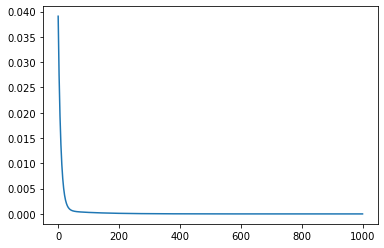

In [11]:
plt.plot(cost_history)


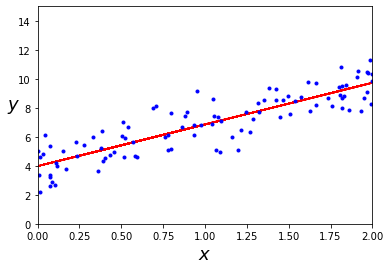

In [12]:
y_predict = w[0][0] + w[1][0]*X 

plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])